## CS 6120: Natural Language Processing - Prof. Ahmad Uzair

Student: Yuqing Qiao  

Date: 02/11/2024

### Assignment 2: Text Classification and Neural Network
### Total Points: 100 points

In Assignment 2, you will be dealing with text classification using Multinomial Naive Bayes and Neural Networks. You will also be dealing with vector visualization.In this assignment you will be using TF-IDF Vectorization instead of Bag of Words. We recommend starting with this assignment a little early as the datasets are quite large and several parts of the assignment might take long duration to execute.

## Question 1 Text Classification

In the first question you will be dealing with 20 News Group Dataset. You are required to implement TF-IDF vectorization from scratch and perform Multinomial Naive Bayes Classification on the News Group Dataset.
You may use appropriate packages or modules for fitting the Multinomial Naive Bayes Model, however, the implementation of the TF-IDF Vectorization should be from the scratch.

The 20 newsgroups dataset comprises around 20000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date.

Link to the original dataset: http://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups

You can also import the dataset from sklearn.datasets

In [ ]:
#importing the libraries

import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
import pandas as pd
import re
import numpy as np
from nltk.tokenize import  word_tokenize
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import math


In [ ]:
# Import the 20 news group dataset utilizing sklearn library

# train dataset
mydata_train = fetch_20newsgroups(subset='train')

# test dataset
mydata_test = fetch_20newsgroups(subset='test')


In [ ]:
# Access the first post in the training data
first_post = mydata_train.data[0]

# Access the category label of the first post
first_post_label = mydata_train.target[0]

# Get the name of the category for the first post
first_post_category_name = mydata_train.target_names[first_post_label]

print("First post text:", first_post)
print("First post's category label:", first_post_label)
print("First post's category name:", first_post_category_name)


First post text: From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





First post's category label: 7
First post's category name: rec.autos


In [ ]:
# Print the news groups(target) in the dataset

pprint(list(mydata_train.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [ ]:
# What is the type of 'mydata_train' and 'mydata_test'

print(type(mydata_train))
print(type(mydata_test))

<class 'sklearn.utils._bunch.Bunch'>
<class 'sklearn.utils._bunch.Bunch'>


In [ ]:
# Check the length of the data

print(len(mydata_train.data))
print(len(mydata_train.filenames))
print(len(mydata_test.data))
print(len(mydata_test.filenames))

11314
11314
7532
7532


### Expected Output:
11314

11314

7532

7532

## Extracting Features from the Dataset                        (20 Points)

In order to perform machine learning on text documents, we first need to turn the text content into numerical feature vectors.

### TF-IDF Vectorization

Our model cannot simply read the text data so we convert it into numerical format. In order to convert the data into numerical format we create vectors from text.

For this particular purpose we could either employ Bag of Words or TF-IDF Vectorization

Bag of Words just creates a set of vectors containing the count of word occurrences in the document (reviews), while the TF-IDF model contains information on the more important words and the less important ones as well.

TF-IDF stands for Term Frequency-Inverse Document Frequency, which instead of giving more weight to words that occur more frequently, it gives a higher weight to words that occur less frequently.

Ref:https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/#:~:text=Bag%20of%20Words%20just%20creates,less%20important%20ones%20as%20well.

TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)

Term Frequency is the measure of the frequency of words in a document. It is the ratio of the number of times the word appears in a document compared to the total number of words in that document.

The words that occur rarely in the corpus have a high IDF score. It is the log of the ratio of the number of documents to the number of documents containing the word.

idf(t) = log(N/(df + 1))

In [ ]:
text = mydata_train.data
test = mydata_test.data


## Preprocessing the Corpus

In [ ]:
# !pip install num2words

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=5f6bd07212ccae74857d548ba45c421d8e2513f3476973c5b5d42d9755209bdc
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from num2words import num2words
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Preprocessing the data

stemmer = PorterStemmer()
lemmer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Preprocess text
def preprocess(document):

    def convert_lower_case(data):
        return np.char.lower(data)

    def remove_stop_words(data):
        processed_data = []
        for word in data:
            if word not in stop_words:
                processed_data.append(word)
        return processed_data

    def remove_punctuation(data):
        alpha_data = []
        for word in data:
            if word.isalpha():
                alpha_data.append(word)
        return alpha_data

    # tokenize
    words = word_tokenize(document)
    # convert to lower case
    words = convert_lower_case(words)
    # remove stop words
    words = remove_stop_words(words)
    # remove punctuation
    words = remove_punctuation(words)
    #lemmatize
    words = [lemmer.lemmatize(word) for word in words]
    #stem
    words = [stemmer.stem(word) for word in words]

    return words

In [ ]:
lines = []
word_list = []

for line in text:
    #tokenize the text documents and update the lists word_list and lines
    cleaned_line = preprocess(line)
    lines.append(cleaned_line)
    word_list += cleaned_line

# Make sure the word_list contains unique tokens
word_list = list(set(word_list))

# Calculate the total documents present in the corpus
total_docs = len(text)

#Create a dictionary to keep track of index of each word
dict_idx = {word:idx for idx, word in enumerate(word_list)}


In [ ]:
#preprocessed sample
lines[0]

In [ ]:
# Create a frequency dictionary
from collections import defaultdict

def frequency_dict(lines):
    '''
    lines: list containing all the tokens
    ---
    freq_word: returns a dictionary which keeps the count of the number of documents containing the given word
    '''

    freq_word = defaultdict(lambda:0)

    for line in lines:
        unique_tokens = set(line)
        for token in unique_tokens:
            freq_word[token] +=1

    return freq_word


In [ ]:
# Create a dictionary containing the frequency of words utilizing the 'frequency_dict' function

# Expect this chunk to take a comparatively longer time to execute since our dataset is large

freq_word = frequency_dict(lines)

len(freq_word.items())


54780

In [ ]:
# Create a function to calculate the Term Frequency

def term_frequency(document, word):
    '''
    document: list containing the entire corpus
    word: word whose term frequency is to be calculated
    ---
    tf: returns term frequency value
    '''
    word_count = document.count(word)
    total_words = len(document)

    tf = word_count/total_words if total_words > 0 else 0

    return tf


In [ ]:
# Create a function to calculate the Inverse Document Frequency

def inverse_df(word):
    '''
    word: word whose inverse document frequency is to be calculated
    ---
    idf: return inverse document frequency value
    '''
    idf = math.log(total_docs/(freq_word[word]+1))
    return idf


In [ ]:
#Create a function to combine the term frequencies (TF) and inverse document (IDF) frequencies calculated above to get TF-IDF

def tfidf(sentence,dict_idx):
    '''
    sentence: list containing the entire corpus
    dict: dictionary keeping track of index of each word
    ---
    tf_idf_vec: returns computed tf-idf
    '''
    tf_idf_vec = [0]*len(dict_idx)

    for word in set(sentence):
        if word in dict_idx:
            index= dict_idx[word]
            tf = term_frequency(sentence,word)
            idf = inverse_df(word)
            tf_idf_vec[index] = tf*idf

    return tf_idf_vec


In [ ]:
def dict_idx_max_features(lines, max_features = None):
    '''
    lines: list containing all the tokens
    maxFeatures: number of features to include
    '''
    global_tf_idf_scores = defaultdict(float)

    for line in lines:
        for word in set(line):
            tf = term_frequency(line, word)
            idf = inverse_df(word)
            global_tf_idf_scores[word] += tf*idf

    sorted_words = sorted(global_tf_idf_scores, key=global_tf_idf_scores.get, reverse=True)
    top_features = sorted_words[:max_features]
    dict_idx = {word:i for i, word in enumerate(top_features)}

    dict_idx = {word: i for i, word in enumerate(top_features)}

    sorted_global_tf_idf_scores = sorted(global_tf_idf_scores.items(), key = lambda item: item[1], reverse=True)
    return dict_idx, sorted_global_tf_idf_scores[:max_features]

In [ ]:
# compress the dict index of word by the tf-idf score of the word
dict_idx, sorted_words = dict_idx_max_features(lines, max_features=8000)

In [ ]:
sorted_words[-1]

('owe', 0.8786512527983122)

In [ ]:
#Compute the vectors utilizing the 'tfidf' function created above to obtain a TF-IDF Encoded text corpus
# train_tf_idf_vectors = [tfidf(sentence, dict_idx) for sentence in lines]
train_tf_idf_vectors = [tfidf(sentence, dict_idx) for sentence in lines]



## Multinomial Naive Bayes (10 Points)

In [ ]:
#Fit a Multinomial Naive Bayes Model on our dataset
X_train = train_tf_idf_vectors
y_train = mydata_train.target

model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [ ]:
#cleaning test data
test_lines = [preprocess(document) for document in test]

#calc test tf-idf vectors for predic
test_tf_idf_vectors = [tfidf(sentence,dict_idx) for sentence in test_lines]

X_test = test_tf_idf_vectors


In [ ]:
#Perform testing on the train dataset

pred = model.predict(X_test)

In [ ]:
#Calculate the F1 Score and the Accuracy

#test dataset label
y_true = mydata_test.target

F1_score = metrics.f1_score(y_true,pred,average="macro")
Accuracy = metrics.accuracy_score(y_true,pred)

print("F1 Score: ", F1_score)
print("Accuracy: ", Accuracy)

F1 Score:  0.7738427915816025
Accuracy:  0.7976633032395114


### Expected Output:
F1 Score: 0.9533633964397735

Accuracy: 0.9524482941488421

Your accuracy does not have to be exactly the same. This is just to give you an estimate of what could you expect your accuracy to be around.

## Validate with sklearn tfidf vectorizer, max features

In [ ]:

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=8000)

# Fit and transform the training data to create TF-IDF
X_train_tfidf = vectorizer.fit_transform(text)

# Since we're using a large dataset, it's efficient to use partial_fit for Naive Bayes
model = MultinomialNB()

model.fit(X_train_tfidf, mydata_train.target)

MultinomialNB()

In [ ]:
X_test_tfidf = vectorizer.transform(test)

pred = model.predict(X_test_tfidf)

In [ ]:
#Calculate the F1 Score and the Accuracy

#test dataset label
y_true = mydata_test.target

F1_score = metrics.f1_score(y_true,pred,average="macro")
Accuracy = metrics.accuracy_score(y_true,pred)

print("F1 Score: ", F1_score)
print("Accuracy: ", Accuracy)

F1 Score:  0.7707293359288692
Accuracy:  0.7869091874668083


## Question 2 Vector Visualization

In this unsupervised learning task we are going to cluster wikipedia articles into groups using T-SNE visualization after vectorization.

### Collect articles from Wikipedia (10 points)

In this section we will download articles from wikipedia and then vectorize them in the next step. You can select somewhat related topics or fetch the articles randomly.
(Use dir() and help() functions or refer wikipedia documentation)
You may also pick any other data source of your choice instead of wikipedia.

In [ ]:
# install libraries
!pip install --upgrade wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=0e85c71c5937c9fbbb3d021b01f27d95e16b288fc9dce8600bbae1eb2d39c170
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [ ]:
import wikipedia
from wikipedia.exceptions import WikipediaException

'''
 Generate a list of wikipedia article to cluster
 You can maintain a static list of titles or generate them randomly using wikipedia library
 Some topics include:
 ["Northeastern University", "Natural language processing", "Machine learning", "Quantum machine learning", "Artificial intelligence", "Data science", "Master in Data Science",
 "Bank of America", "Visa Inc.", "European Central Bank", "Bank", "Financial technology","International Monetary Fund",
 "Basketball", "Swimming", "Tennis", "Football", "College Football", "Association Football"]

 You can add more topics from different categories so that we have a diverse dataset to work with.
 Ex- About 3+ categories(groups), 3+ topics in each category, 3+ articles in each topic
'''

# selected topics
topics = [
    "Northeastern University", "Natural language processing", "Machine learning", "Quantum machine learning", "Artificial intelligence", "Data science", "Master in Data Science",
    "Bank of America", "Visa Inc.", "European Central Bank", "Bank", "Financial technology","International Monetary Fund",
    "Basketball", "Swimming", "Tennis", "Football", "College Football", "Association Football"]

catg_topics = [
    ["Northeastern University", "Natural language processing", "Machine learning", "Quantum machine learning", "Artificial intelligence", "Data science", "Master in Data Science"],
    ["Bank of America", "Visa Inc.", "European Central Bank", "Bank", "Financial technology","International Monetary Fund"],
    ["Basketball", "Swimming", "Tennis", "Football", "College Football", "Association Football"]
]

# search wikipedia articles
def search_articles(catergories):
    all_articles = [] #store all articles for all categories
    for catg in catergories:
        catg_articles = [] #store articles for current category
        for topic in catg:
            try:
                articles = wikipedia.search(topic)
                catg_articles.extend(articles[:3])
            except WikipediaException as e:
                print(f"Error fetching article for {topic}: {e}")
        all_articles.append(catg_articles)
    return all_articles

# list of articles to be downloaded, List[List[article]]
articles = []
articles = search_articles(catg_topics)


In [ ]:
#download article summary from wikipedia, labels is mapping of catg to summaries index in data
def download_articles(articles):
    summaries = []
    labels = [] #store article catergory to data index for t-sne colors

    for catg_i, catg in enumerate(articles):
        for article in catg:
            try:
                summary = wikipedia.summary(article,auto_suggest=False)
                summaries.append(summary)
                labels.append(catg_i)

            #use first suggestion if wikipedia find multi mathced articles
            except wikipedia.DisambiguationError as e:
                try:
                    first_suggestion = e.options[0]
                    summary = wikipedia.summary(first_suggestion,auto_suggest=False)
                    summaries.append(summary)
                    labels.append(catg_i)

                except WikipediaException as e:
                    print(f"Error fetching article summary for {first_suggestion}: {e}")
            except WikipediaException as e:
                print(f"Error fetching article summary for {article}: {e}")

    return summaries, labels

# download and store articles (summaries) in this variable
data = []
data,labels = download_articles(articles)


/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


In [ ]:
#wikipedia search topic
# wikipedia.search("Northeastern University")

data[0]


'Northeastern University (NU or NEU) is a private research university with its main campus in Boston, Massachusetts. Established in 1898, it was founded by the Boston Young Men\'s Christian Association as an all-male institute before being incorporated as Northeastern College in 1916, gaining university status in 1922. With more than 36,000 students, Northeastern is one of the largest universities in Massachusetts by enrollment.Northeastern is a large, highly residential university which comprises nine schools, including the Northeastern University School of Law. The university\'s main campus in Boston is located within the center of the city along Huntington Avenue and Columbus Avenue near the Fenway–Kenmore and Roxbury neighborhoods. It offers undergraduate and graduate programs, and most undergraduates participate in a cooperative education program. Northeastern is accredited by the New England Commission of Higher Education and is a member of the Boston Consortium for Higher Educat

### Cleaning the Data (5 points)
In this step you will decide whether to clean the data or not. If you choose to clean, you may utilize the clean function from assignment 1.

**Question:** Why are you (not) choosing to clean the data? Think in terms of whether cleaning data will help in the clustering or not.

**Answer(1-3 sentences):**

I have opted to clean the data because my objective involves clustering articles, and I consider stop words to detract from the quality of my clustering by adding unnecessary noise. I believe that by cleaning the data—removing these irrelevant elements—I can enhance the quality of the clustering outcomes and speed up the trainning process by reducing the size of the corpus.

In [ ]:
# You can use Assignment 1's clean message function
import re
import nltk
import string
# nltk.download('punkt')
# nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_message(message):
    tokens = word_tokenize(message.lower())

    cleaned = [word for word in tokens if word not in stop_words and word.isalpha()]

    stemed = [stemmer.stem(token) for token in cleaned]

    return " ".join(stemed)

cleaned_summaries = [clean_message(summary) for summary in data]


### Vectorize the articles (5 points)

In this step, we will vectorize the text data. You can use TfidfVectorizer() or countVectorizer() from sklearn library.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

tfidf_vectorizer = TfidfVectorizer()

X = tfidf_vectorizer.fit_transform(cleaned_summaries)



In [ ]:
print(X.shape)

(57, 2102)


### Sample Output:
(36, 1552)

### Plot Articles (10 points)
Now we will try to verify the groups of articles using T-SNE from sklearn library.

In [ ]:
from sklearn.manifold import TSNE

# call TSNE() to fit the data
tsne = TSNE(n_components=2, perplexity=20, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X.toarray())  # T-SNE expects a dense matrix


Plot and annotate the points with different markers for different expected groups.

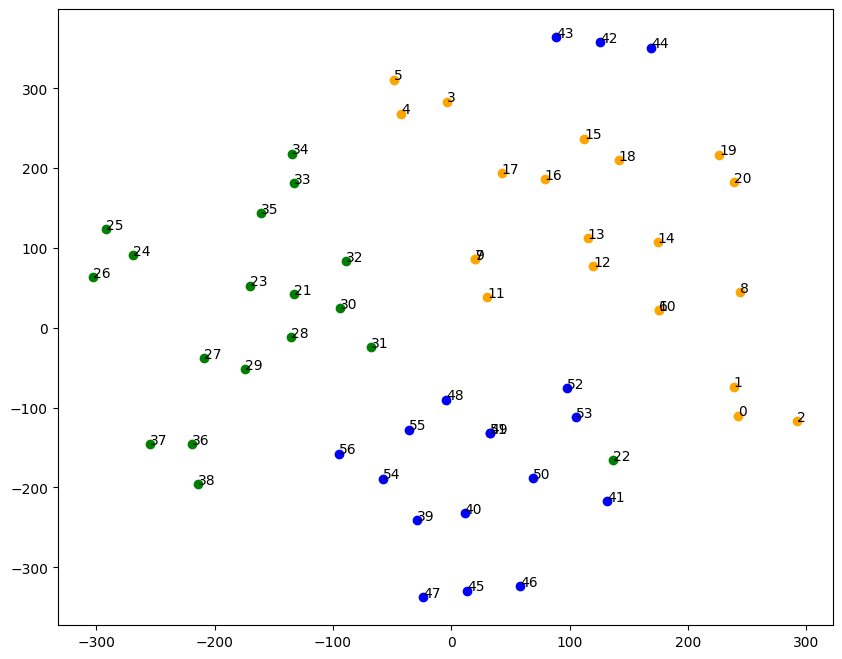

In [ ]:
category_colors = ['orange','green','blue']

# get a figure handle
fig,ax = plt.subplots(figsize=(10,8))

for i,(x,y) in enumerate(X_tsne):
    category = labels[i]
    ax.scatter(x,y, color = category_colors[category])
    ax.text(x,y,str(i), color='black')

plt.show()


**Question:** Comment about the categorizion done by T-SNE. Do the articles of related topics cluster together? (5 points)

**Answer(1-3 sentences):**  
Yes, related articles appear to be clustered together, but the visualization depends on the hyperparameter settings of t-SNE. Higher perplexity causes the plot to be more sparse, and vice versa.

# Question 3 Building Neural Networks

### We are gonna use Emotions Dataset for this task. We need to classify the given text into different kind of emotions like happy,sad,anger etc..,

### We are providing train.txt and val.txt files along with this notebook.

### Library Imports and Utility functions

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re
# string.punctuation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())

def clean_text(text):
  # From the last assignment
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


### Q) Importing the datasets and do the necessary cleaning and convert the text into the vectors which are mentioned in the below code blocks. (10 points)

In [ ]:
# Import the train.txt and val.txt file into pandas dataframe format

# from google.colab import drive
# drive.mount('/content/drive')

# train
train_path = '/content/drive/MyDrive/Colab Notebooks/6120NLP/assignment2/train-1.txt'
train_df = pd.read_csv(train_path, sep=';', names=['Document','Emotion'])

# validation
val_path = '/content/drive/MyDrive/Colab Notebooks/6120NLP/assignment2/val-1.txt'
validation_df = pd.read_csv(val_path, sep=';', names=['Document','Emotion'])

# and printout the train.shape and validation.shape
print(f'Train: ',train_df.shape)
print(f'Validation: ',validation_df.shape)
# expected shape of train dataset is (16000,2) and validation dataset is (2000,2)


Train:  (16000, 2)
Validation:  (2000, 2)


In [ ]:
# clean the text in the train and validation dataframes using the clean_text function provided above
train_df['Cleaned'] = train_df['Document'].apply(clean_text)
validation_df['Cleaned'] = validation_df['Document'].apply(clean_text)

In [ ]:
print(train_df['Emotion'].unique())
train_df.head()

['sadness' 'anger' 'love' 'surprise' 'fear' 'joy']


,Document,Emotion,Cleaned
0,i didnt feel humiliated,sadness,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,anger,feeling grouchy


In [ ]:
# initialise count vectorizer from sklearn module with default parameter
vectorizer = CountVectorizer(ngram_range=(1, 2))

# fit on train dataset and transform both train and validation dataset
vectorizer.fit(train_df['Cleaned'])

train_vectors = vectorizer.transform(train_df['Cleaned'])
val_vectors = vectorizer.transform(validation_df['Cleaned'])


In [ ]:
# initialise tfidf vectorizer from sklearn module with default parameter
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))

# fit on train dataset and transform both train and validation dataset
tfidf_vectorizer.fit(train_df['Cleaned'])

train_tfidf = tfidf_vectorizer.transform(train_df['Cleaned'])
val_tfidf = tfidf_vectorizer.transform(validation_df['Cleaned'])


In [ ]:
# initialise label encoder from sklearn module
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

# fit on train labels and transform both train and validation labels
label_encoder.fit(train_df['Emotion'])

train_labels_encoded = label_encoder.transform(train_df['Emotion'])
val_labels_encoded = label_encoder.transform(validation_df['Emotion'])


In [ ]:
# convert the labels into one hot encoding form
onehot_encoder = preprocessing.OneHotEncoder(sparse_output=False)

# Reshape because fit_transform expects a 2D array
train_labels_encoded_reshaped = train_labels_encoded.reshape(len(train_labels_encoded), 1)
val_labels_encoded_reshaped = val_labels_encoded.reshape(len(val_labels_encoded), 1)

# Fit and transform the encoded labels
train_labels_onehot = onehot_encoder.fit_transform(train_labels_encoded_reshaped)
val_labels_onehot = onehot_encoder.transform(val_labels_encoded_reshaped)


### Q) Build the neural networks using tensorflow keras by following the below instructions. Evaluate the model on different metrics and comment your observations. (20 points)

In [ ]:
import tensorflow as tf
# from tensorflow.python.keras import layers, models, regularizers

tf.random.set_seed(42)


# complete this linear model in tensorflow
def build_model(X):
  num_classes = len(np.unique(train_labels_encoded))

  # layer 1 : input layer
  inp = tf.keras.Input((X.shape[1],))

  # layer 2 : add the dense layer with 2048 units and relu activation
  x = tf.keras.layers.Dense(2048, activation = 'relu')(inp)

  # layer 3 : add the dropout layer with dropout rate of 0.5
  x = tf.keras.layers.Dropout(0.5)(x)

  # layer 4 : add the dense layer with 1024 units with tanh activation and with l2 regularization
  x = tf.keras.layers.Dense(1024, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)

  # layer 5 : add the dropout layer with dropout rate of 0.5
  x = tf.keras.layers.Dropout(0.5)(x)

  # layer 6 : add the dense layer with 512 units with tanh activation and with l2 regularization
  x = tf.keras.layers.Dense(512, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)

  # layer 7 : add the dropout layer with dropout rate of 0.5
  x = tf.keras.layers.Dropout(0.5)(x)

  # layer 8 : add the dense layer with 256 units with tanh activation and with l2 regularization
  x = tf.keras.layers.Dense(256, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)

  # layer 9 : add the dropout layer with dropout rate of 0.5
  x = tf.keras.layers.Dropout(0.5)(x)

  # layer 10 : add the dense layer with 128 units with tanh activation and with l2 regularization
  x = tf.keras.layers.Dense(128, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)

  # layer 11 : add the dropout layer with dropout rate of 0.5
  x = tf.keras.layers.Dropout(0.5)(x)

  # layer 12 : output layer with units equal to number of classes and activation as softmax
  output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

  # use loss as categorical crossentropy, optimizer as rmsprop and evaluate model on auc,precision,recall,accuracy
  model = tf.keras.models.Model(inputs=inp, outputs=output)

  # Compile the model
  model.compile(loss='categorical_crossentropy',
                optimizer='rmsprop',
                metrics=['AUC', 'Precision', 'Recall', 'Accuracy'])

  return model


In [ ]:
# call the build_model function and initialize the model

tf_model = build_model(train_vectors)

In [ ]:
# train and validate the model on the count vectors of text which we have created initially for 10 epochs,
# adjust batch size according to your computation power (suggestion use : 8)

tf_history = tf_model.fit(x=train_vectors.toarray(),
                    y=train_labels_onehot,
                    batch_size=8,  # Adjust batch size according to your computation power
                    epochs=10,  # Train for 10 epochs
                    validation_data=(val_vectors.toarray(), val_labels_onehot))  # Validation data


Epoch 1/10
2000/2000 [==============================] - 60s 29ms/step - loss: 2.0231 - auc: 0.8283 - precision: 0.6934 - recall: 0.2586 - Accuracy: 0.5016 - val_loss: 1.2144 - val_auc: 0.8971 - val_precision: 0.7238 - val_recall: 0.5465 - val_Accuracy: 0.6190
Epoch 2/10
2000/2000 [==============================] - 45s 22ms/step - loss: 1.1471 - auc: 0.9136 - precision: 0.7335 - recall: 0.5665 - Accuracy: 0.6610 - val_loss: 1.1800 - val_auc: 0.9126 - val_precision: 0.7325 - val_recall: 0.5955 - val_Accuracy: 0.6890
Epoch 3/10
2000/2000 [==============================] - 45s 22ms/step - loss: 1.0133 - auc: 0.9386 - precision: 0.7718 - recall: 0.6577 - Accuracy: 0.7239 - val_loss: 1.1441 - val_auc: 0.9195 - val_precision: 0.7417 - val_recall: 0.6605 - val_Accuracy: 0.7070
Epoch 4/10
2000/2000 [==============================] - 45s 22ms/step - loss: 0.9482 - auc: 0.9492 - precision: 0.7943 - recall: 0.7038 - Accuracy: 0.7522 - val_loss: 1.1813 - val_auc: 0.9236 - val_precision: 0.7457 - va

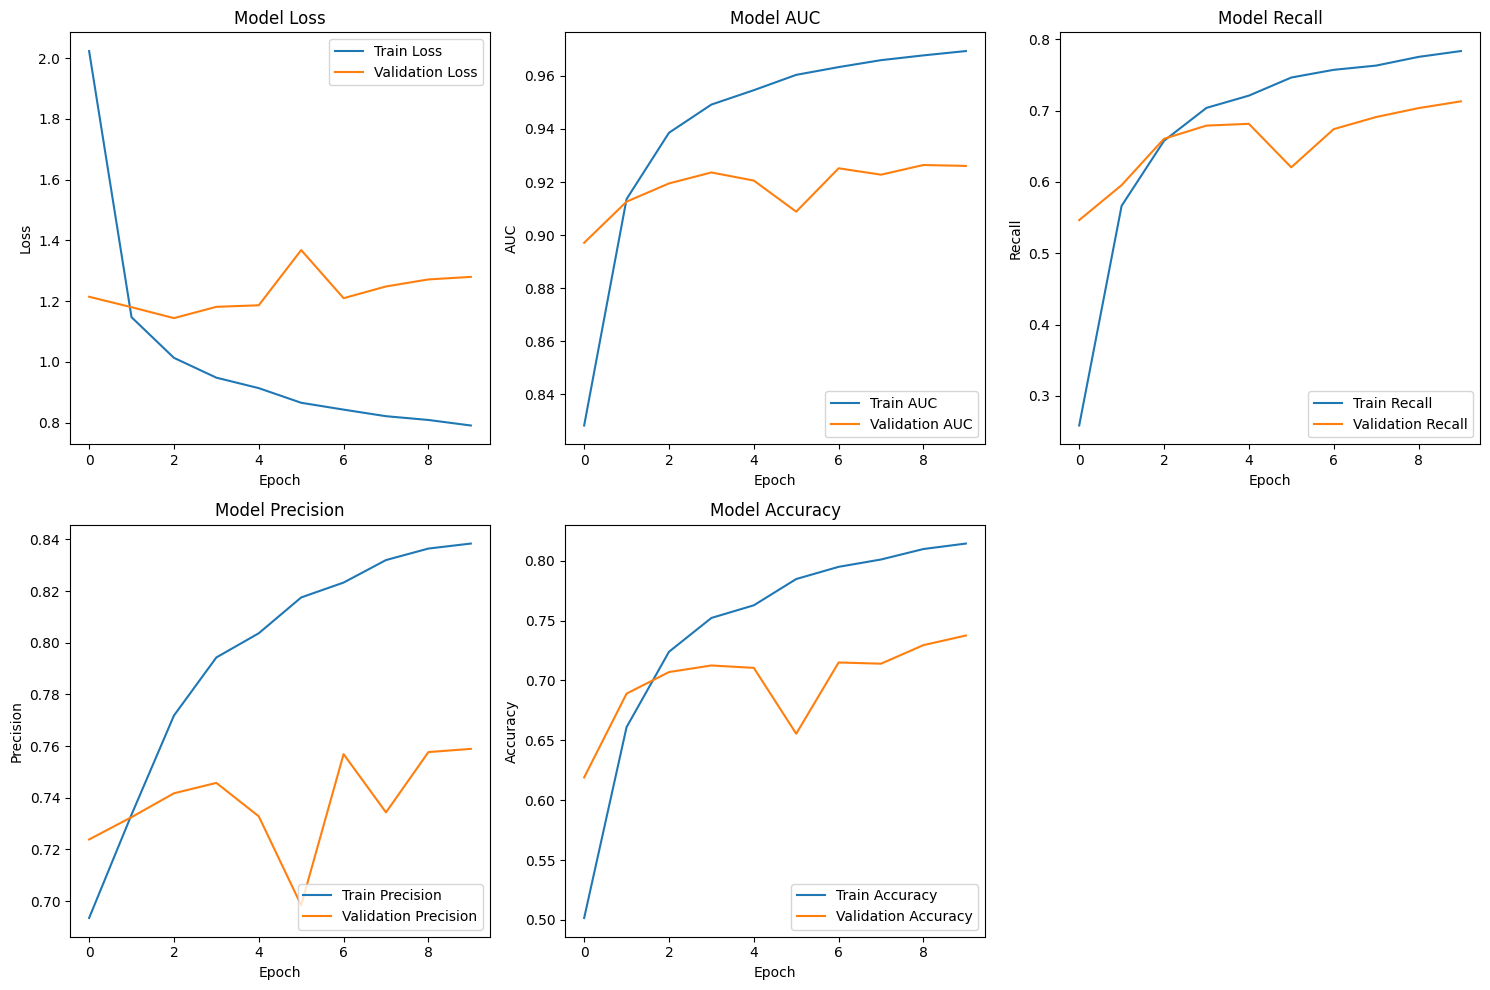

In [ ]:
# plot train loss vs val loss, train auc vs val auc, train recall vs val recall, train precision vs val precision and train accuracy vs val accuracy and comment your observations

import matplotlib.pyplot as plt

# Assuming 'history.history' contains your metrics history
# Create a figure and a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10)) # Adjust the overall figure size as needed

# Plot 1: Training & Validation Loss
axs[0, 0].plot(tf_history.history['loss'], label='Train Loss')
axs[0, 0].plot(tf_history.history['val_loss'], label='Validation Loss')
axs[0, 0].set_title('Model Loss')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend(loc='upper right')

# Plot 2: Training & Validation AUC
axs[0, 1].plot(tf_history.history['auc'], label='Train AUC')
axs[0, 1].plot(tf_history.history['val_auc'], label='Validation AUC')
axs[0, 1].set_title('Model AUC')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('AUC')
axs[0, 1].legend(loc='lower right')

# Plot 3: Training & Validation Recall
axs[0, 2].plot(tf_history.history['recall'], label='Train Recall')
axs[0, 2].plot(tf_history.history['val_recall'], label='Validation Recall')
axs[0, 2].set_title('Model Recall')
axs[0, 2].set_xlabel('Epoch')
axs[0, 2].set_ylabel('Recall')
axs[0, 2].legend(loc='lower right')

# Plot 4: Training & Validation Precision
axs[1, 0].plot(tf_history.history['precision'], label='Train Precision')
axs[1, 0].plot(tf_history.history['val_precision'], label='Validation Precision')
axs[1, 0].set_title('Model Precision')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Precision')
axs[1, 0].legend(loc='lower right')

# Plot 5: Training & Validation Accuracy
axs[1, 1].plot(tf_history.history['Accuracy'], label='Train Accuracy') # Adjust key if necessary
axs[1, 1].plot(tf_history.history['val_Accuracy'], label='Validation Accuracy') # Adjust key if necessary
axs[1, 1].set_title('Model Accuracy')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('Accuracy')
axs[1, 1].legend(loc='lower right')

# Hide the 6th subplot (bottom right)
axs[1, 2].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# again call the build_model function and initialize the model
tfidf_model = build_model(train_tfidf)

In [ ]:
# train and validate the model on the tfidf vectors of text which we have created initially for 10 epochs,
# adjust batch size according to your computation power (suggestion use : 8)
tfidf_history = tfidf_model.fit(x=train_tfidf.toarray(),  # Converting sparse matrix to dense, adjust if memory allows
                    y=train_labels_onehot,
                    batch_size=16,  # Adjust batch size according to your computation power
                    epochs=10,  # Train for 10 epochs
                    validation_data=(val_tfidf.toarray(), val_labels_onehot))  # Validation data


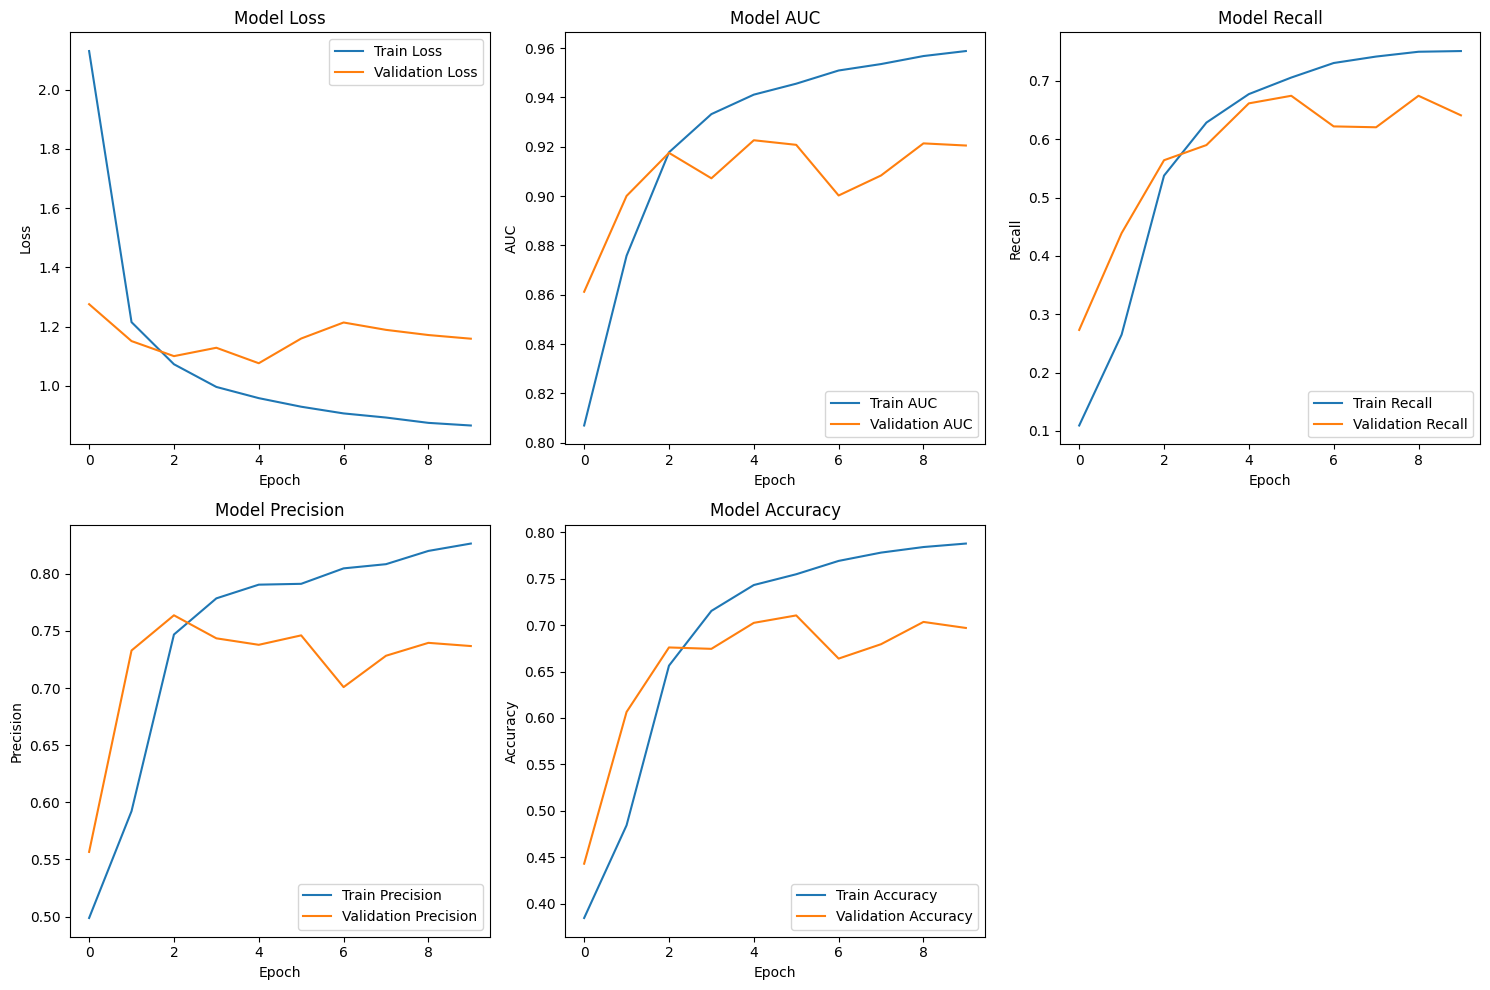

In [ ]:
# plot train loss vs val loss, train auc vs val auc, train recall vs val recall, train precision vs val precision and train accuracy vs val accuracy and comment your observations

import matplotlib.pyplot as plt

# Assuming 'history.history' contains your metrics history
# Create a figure and a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10)) # Adjust the overall figure size as needed

# Plot 1: Training & Validation Loss
axs[0, 0].plot(tfidf_history.history['loss'], label='Train Loss')
axs[0, 0].plot(tfidf_history.history['val_loss'], label='Validation Loss')
axs[0, 0].set_title('Model Loss')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend(loc='upper right')

# Plot 2: Training & Validation AUC
axs[0, 1].plot(tfidf_history.history['auc'], label='Train AUC')
axs[0, 1].plot(tfidf_history.history['val_auc'], label='Validation AUC')
axs[0, 1].set_title('Model AUC')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('AUC')
axs[0, 1].legend(loc='lower right')

# Plot 3: Training & Validation Recall
axs[0, 2].plot(tfidf_history.history['recall'], label='Train Recall')
axs[0, 2].plot(tfidf_history.history['val_recall'], label='Validation Recall')
axs[0, 2].set_title('Model Recall')
axs[0, 2].set_xlabel('Epoch')
axs[0, 2].set_ylabel('Recall')
axs[0, 2].legend(loc='lower right')

# Plot 4: Training & Validation Precision
axs[1, 0].plot(tfidf_history.history['precision'], label='Train Precision')
axs[1, 0].plot(tfidf_history.history['val_precision'], label='Validation Precision')
axs[1, 0].set_title('Model Precision')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Precision')
axs[1, 0].legend(loc='lower right')

# Plot 5: Training & Validation Accuracy
axs[1, 1].plot(tfidf_history.history['Accuracy'], label='Train Accuracy') # Adjust key if necessary
axs[1, 1].plot(tfidf_history.history['val_Accuracy'], label='Validation Accuracy') # Adjust key if necessary
axs[1, 1].set_title('Model Accuracy')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('Accuracy')
axs[1, 1].legend(loc='lower right')

# Hide the 6th subplot (bottom right)
axs[1, 2].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


## Prediction


In [ ]:
test_input = "I like it"
cleaned_input = clean_text(test_input)

transformed = vectorizer.transform([cleaned_input])

# Make a prediction with your trained model
prediction = tf_model.predict(transformed.toarray())

# Ensure the prediction is in the expected format (2D)
predicted_class_index = prediction.argmax(axis=1)

# Inverse transform to get original labels
predicted_label = label_encoder.inverse_transform(predicted_class_index)

print(predicted_label)


1/1 [==============================] - 0s 27ms/step
['sadness']


In [ ]:
label_encoder.classes_

array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'],
      dtype=object)

##Saved model

In [ ]:
from tensorflow.python.saved_model.save import save
import os

path = os.path.join("/tmp/", "/mobilenetv2/saved_model.h5")
tf_model.save(path)

In [ ]:
!pip3 install tensorflowjs


##Load model

In [ ]:
model_path = "/content/drive/MyDrive/Colab Notebooks/emotion_tf_classifier"
loaded_model = tf.keras.models.load_model(model_path)


In [ ]:
test_input = "I really like you"
cleaned_input = clean_text(test_input)

transformed = tfidf_vectorizer.transform([cleaned_input])

# Make a prediction with your trained model
prediction = loaded_model.predict(transformed.toarray())

# Ensure the prediction is in the expected format (2D)
predicted_class_index = prediction.argmax(axis=1)

# Inverse transform to get original labels
predicted_label = label_encoder.inverse_transform(predicted_class_index)

print(predicted_label)


1/1 [==============================] - 0s 31ms/step
['sadness']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Comments:

Training loss continues to decrease, while accuracy and precision continue to increase. However, after a certain number of training epochs, the rate of learning decreases.

It appears that the validation metrics for accuracy, AUC, precision, and recall scoring around 70%. My assumption is that the model is too simplistic to capture the complexity of the emotional structure and fails to generalize the relationships in the data effectively.

Another possible reason the metrics graph indicates high scores on the training dataset but poor performance on the validation dataset is model overfitting. The model captures excessive features from the training data, rendering it unable to generalize effectively to the validation data.

## Question 4 Theory Question  

What is the difference between Count Vectorizer, TFIDF, Word2Vec and Glove? (5 points)

**Answer:**

They are difference approaches to representing the semantic relationships between words.

`Count Vectorizer`: Vectors of counting of the words.

`TFIDF`: It consider not just the frequency of a word but also weighting unique word across document

`Word2Vec`: A predictive model which captures deep semantic relationships and analogies between words.

`Glove`: It combines the advantages of the count-based models (like Count Vectorizer and TF-IDF) and predictive models (like Word2Vec) by using matrix factorization techniques on a word co-occurrence matrix to learn word embeddings.

*What* is the significant difference between the Naive Bayes Implementation using Bag of Words and TF-IDF? (5 points)

**Answer:**

In the Bag of Words model, text is transformed into a fixed-length vector that counts the occurrences of each word within a document. This approach counts the number of times a particular word appears in the document, treating every word as equally important without considering the context in which it appears.

In contrast, TF-IDF (Term Frequency-Inverse Document Frequency) measures the importance of a word based on its frequency in a specific document relative to its frequency across all documents in the corpus. The importance of a word is proportional to its occurrence within a given document but inversely proportional to its frequency across the entire corpus of documents.

## DIY New Emotion Recognition for Tensorflow Js

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np

def show_history(h):
  # plot train loss vs val loss, train auc vs val auc, train recall vs val recall, train precision vs val precision and train accuracy vs val accuracy and comment your observations

  # Assuming 'history.history' contains your metrics history
  # Create a figure and a 2x3 grid of subplots
  fig, axs = plt.subplots(2, 3, figsize=(15, 10)) # Adjust the overall figure size as needed

  # Plot 1: Training & Validation Loss
  axs[0, 0].plot(h.history['loss'], label='Train Loss')
  axs[0, 0].plot(h.history['val_loss'], label='Validation Loss')
  axs[0, 0].set_title('Model Loss')
  axs[0, 0].set_xlabel('Epoch')
  axs[0, 0].set_ylabel('Loss')
  axs[0, 0].legend(loc='upper right')

  # Plot 2: Training & Validation AUC
  axs[0, 1].plot(h.history['auc'], label='Train AUC')
  axs[0, 1].plot(h.history['val_auc'], label='Validation AUC')
  axs[0, 1].set_title('Model AUC')
  axs[0, 1].set_xlabel('Epoch')
  axs[0, 1].set_ylabel('AUC')
  axs[0, 1].legend(loc='lower right')

  # Plot 3: Training & Validation Recall
  axs[0, 2].plot(h.history['recall'], label='Train Recall')
  axs[0, 2].plot(h.history['val_recall'], label='Validation Recall')
  axs[0, 2].set_title('Model Recall')
  axs[0, 2].set_xlabel('Epoch')
  axs[0, 2].set_ylabel('Recall')
  axs[0, 2].legend(loc='lower right')

  # Plot 4: Training & Validation Precision
  axs[1, 0].plot(h.history['precision'], label='Train Precision')
  axs[1, 0].plot(h.history['val_precision'], label='Validation Precision')
  axs[1, 0].set_title('Model Precision')
  axs[1, 0].set_xlabel('Epoch')
  axs[1, 0].set_ylabel('Precision')
  axs[1, 0].legend(loc='lower right')

  # Plot 5: Training & Validation Accuracy
  axs[1, 1].plot(h.history['accuracy'], label='Train Accuracy') # Adjust key if necessary
  axs[1, 1].plot(h.history['val_accuracy'], label='Validation Accuracy') # Adjust key if necessary
  axs[1, 1].set_title('Model Accuracy')
  axs[1, 1].set_xlabel('Epoch')
  axs[1, 1].set_ylabel('Accuracy')
  axs[1, 1].legend(loc='lower right')

  # Hide the 6th subplot (bottom right)
  axs[1, 2].axis('off')

  # Adjust layout to prevent overlap
  plt.tight_layout()

  # Show the plot
  plt.show()


In [ ]:
# Import the train.txt and val.txt file into pandas dataframe format

from google.colab import drive
drive.mount('/content/drive')

# train
train_path = '/content/drive/MyDrive/Colab Notebooks/6120NLP/assignment2/train-1.txt'
train_df = pd.read_csv(train_path, sep=';', names=['Document','Emotion'])

# validation
val_path = '/content/drive/MyDrive/Colab Notebooks/6120NLP/assignment2/val-1.txt'
validation_df = pd.read_csv(val_path, sep=';', names=['Document','Emotion'])

# and printout the train.shape and validation.shape
print(f'Train: ',train_df.shape)
print(f'Validation: ',validation_df.shape)
# expected shape of train dataset is (16000,2) and validation dataset is (2000,2)


Mounted at /content/drive
Train:  (16000, 2)
Validation:  (2000, 2)


In [ ]:
validation_df[-10:]

,Document,Emotion,Preprocessed
1990,i just feel too overwhelmed i can t see the fo...,fear,feel overwhelm see forest tree say go
1991,i cant help but feel sentimental about the fac...,sadness,cant help feel sentiment fact drawn
1992,i feel i should make is how surprised but ente...,surprise,feel make surpris entertain inclus mani popula...
1993,i feel so tortured by it,anger,feel tortur
1994,i feel a bit rude leaving you hanging there fr...,anger,feel bit rude leav hang last post almost done ...
1995,im having ssa examination tomorrow in the morn...,sadness,im ssa examin tomorrow morn im quit well prepa...
1996,i constantly worry about their fight against n...,joy,constantli worri fight natur push limit inner ...
1997,i feel its important to share this info for th...,joy,feel import share info experi thing
1998,i truly feel that if you are passionate enough...,joy,truli feel passion enough someth stay true suc...
1999,i feel like i just wanna buy any cute make up ...,joy,feel like wan na buy cute make see onlin even one


In [ ]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import  word_tokenize

# from num2words import num2words
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Preprocessing the data

stemmer = PorterStemmer()
lemmer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Preprocess text
def preprocess(document):

    def convert_lower_case(data):
        return [word.lower() for word in data]

    def remove_stop_words(data):
        processed_data = []
        for word in data:
            if word not in stop_words:
                processed_data.append(word)
        return processed_data

    def remove_punctuation(data):
        alpha_data = []
        for word in data:
            if word.isalpha():
                alpha_data.append(word)
        return alpha_data

    # tokenize
    words = word_tokenize(document)
    # convert to lower case
    words = convert_lower_case(words)
    # remove stop words
    words = remove_stop_words(words)
    # remove punctuation
    words = remove_punctuation(words)
    #lemmatize
    words = [lemmer.lemmatize(word) for word in words]
    #stem
    words = [stemmer.stem(word) for word in words]

    return " ".join(words)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer(num_words=1000,oov_token="<UNK>")

# clean the text in the train and validation dataframes using the clean_text function provided above
train_df['Preprocessed'] = train_df['Document'].apply(preprocess)
validation_df['Preprocessed'] = validation_df['Document'].apply(preprocess)

text = train_df['Preprocessed'].values
labels = train_df['Emotion'].values

val = validation_df['Preprocessed'].values
val_labels = validation_df['Emotion'].values

tokenizer.fit_on_texts(text)


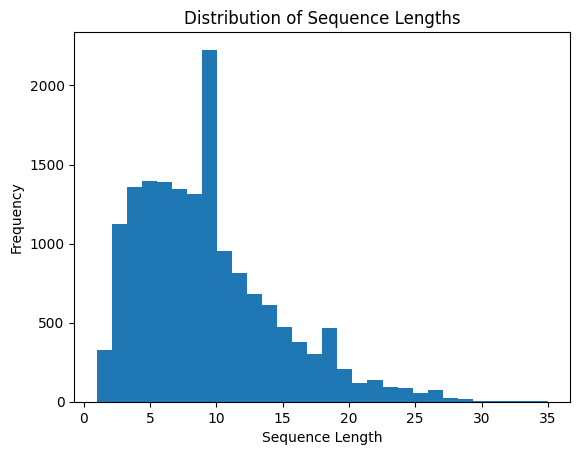

In [ ]:
# Assuming 'texts' contains all your documents
# all_sequences = tokenizer.texts_to_sequences(text)
sequence_lengths = [len(t.split(' ')) for t in text]

# Visualize the distribution
import matplotlib.pyplot as plt

plt.hist(sequence_lengths, bins=30)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sequence Lengths')
plt.show()
# maxlen = int(np.percentile(sequence_lengths, 95))
maxlen = 35

In [ ]:
#vectorization

def get_sequence(tokenizer, text):
  sequences = tokenizer.texts_to_sequences(text)
  padded = pad_sequences(sequences,truncating='post',padding='post',maxlen=maxlen)
  return padded


In [ ]:
# # target classes
# classes = set(labels)
# classes_id = dict((c, i) for i, c in enumerate(classes))

# def names_to_ids(labels):
#     return np.array([classes_id[c] for c in labels])


In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(labels)

train_labels_encoded = label_encoder.transform(labels)
val_labels_encoded = label_encoder.transform(val_labels)

# convert the labels into one hot encoding form
onehot_encoder = preprocessing.OneHotEncoder(sparse_output=False)

# Reshape because fit_transform expects a 2D array
train_labels_encoded_reshaped = train_labels_encoded.reshape(len(train_labels_encoded), 1)
val_labels_encoded_reshaped = val_labels_encoded.reshape(len(val_labels_encoded), 1)

# Fit and transform the encoded labels
train_labels_onehot = onehot_encoder.fit_transform(train_labels_encoded_reshaped)
val_labels_onehot = onehot_encoder.transform(val_labels_encoded_reshaped)


In [ ]:
padded_train_seq = get_sequence(tokenizer,text=text)
padded_val_seq = get_sequence(tokenizer, val)

# train_labels_encoded = names_to_ids(labels)
# val_labels_encoded = names_to_ids(val_labels)

In [ ]:
num_classes = len(set(labels))

model=tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=1000,output_dim=16,input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(num_classes,activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    run_eagerly=True,
    metrics=['AUC', 'Precision', 'Recall', 'accuracy'])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 35, 16)            16000     
                                                                 
 bidirectional_2 (Bidirecti  (None, 35, 40)            5920      
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 40)                9760      
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 6)                 246       
                                                                 
Total params: 31926 (124.71 KB)
Trainable params: 31926 (124.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
h = model.fit(
  x=padded_train_seq,
  y=train_labels_onehot,
  batch_size=32,
  validation_data = (padded_val_seq,val_labels_onehot),
  epochs=20,
  callbacks =[
      tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=2)
  ]
)

Epoch 1/20


500/500 [==============================] - 64s 119ms/step - loss: 1.3121 - auc: 0.8175 - precision: 0.7537 - recall: 0.2364 - accuracy: 0.4804 - val_loss: 0.9347 - val_auc: 0.9126 - val_precision: 0.7930 - val_recall: 0.5020 - val_accuracy: 0.6270
Epoch 2/20
500/500 [==============================] - 48s 97ms/step - loss: 0.7171 - auc: 0.9482 - precision: 0.8271 - recall: 0.6354 - accuracy: 0.7321 - val_loss: 0.6415 - val_auc: 0.9573 - val_precision: 0.8215 - val_recall: 0.7135 - val_accuracy: 0.7785
Epoch 3/20
500/500 [==============================] - 50s 99ms/step - loss: 0.4804 - auc: 0.9752 - precision: 0.8715 - recall: 0.8004 - accuracy: 0.8351 - val_loss: 0.5215 - val_auc: 0.9711 - val_precision: 0.8607 - val_recall: 0.7815 - val_accuracy: 0.8140
Epoch 4/20
500/500 [==============================] - 48s 97ms/step - loss: 0.3941 - auc: 0.9830 - precision: 0.8920 - recall: 0.8374 - accuracy: 0.8619 - val_loss: 0.4672 - val_auc: 0.9766 - val_precision: 0.8747 - val_recall: 0.8065 -

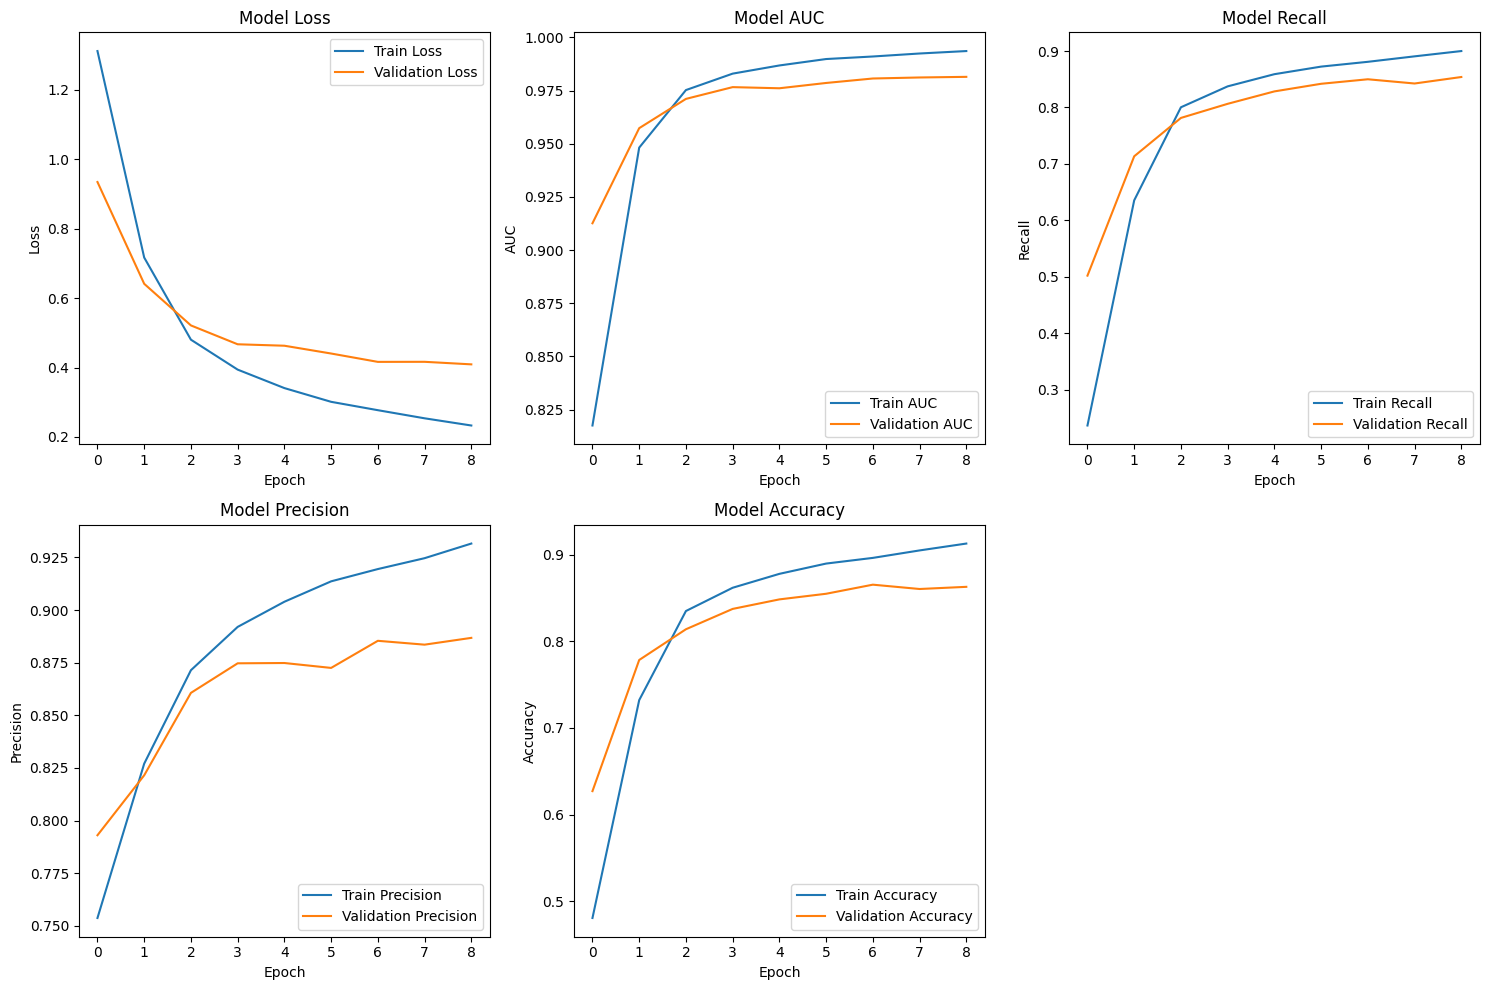

In [ ]:
#Plot accuracy, precission...
show_history(h)

In [ ]:
inputs = ["feel overwhelm see forest tree say go"]
padded_inputs = get_sequence(tokenizer, inputs)
prediction = model.predict(padded_inputs)

class_index= prediction.argmax(axis=1)
class_name = label_encoder.inverse_transform(class_index)
print(class_name)

1/1 [==============================] - 0s 41ms/step
['surprise']


In [ ]:
#save model

save_dir = os.path.join("/tmp/", 'saved_models/emotion_model.h5')
model.save(save_dir)


In [ ]:
!pip3 install tensorflowjs

In [ ]:
!cd /tmp/saved_models/
!tensorflowjs_converter --input_format=keras --output_format=tfjs_layers_model /tmp/saved_models/emotion_model.h5 /tmp/tfjs_emotion_model

In [ ]:
!zip -r /tmp/tfjs_emotion_model.zip /tmp/tfjs_emotion_model